In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### **Dataset Preparation**

For the rest of the homework, you'll need to use only these columns:

- 'age',
- 'job',
- 'marital',
- 'education',
- 'balance',
- 'housing',
- 'contact',
- 'day',
- 'month',
- 'duration',
- 'campaign',
- 'pdays',
- 'previous',
- 'poutcome',
- 'y'

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35188,51,management,married,secondary,no,441,yes,no,cellular,7,may,189,2,167,2,other,no
40956,67,retired,married,secondary,no,1146,no,no,cellular,13,aug,187,2,-1,0,unknown,no
30894,40,management,married,secondary,no,99,no,no,cellular,9,feb,15,5,-1,0,unknown,no
34832,34,technician,divorced,secondary,no,8,yes,no,cellular,6,may,569,2,-1,0,unknown,no
44303,27,services,single,secondary,no,230,no,no,unknown,27,jul,5,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
           'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df.loc[:, columns]
df.sample(5)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24650,36,management,married,tertiary,7,yes,cellular,17,nov,501,2,-1,0,unknown,no
36883,48,blue-collar,married,secondary,525,yes,cellular,12,may,325,2,-1,0,unknown,no
18961,46,blue-collar,married,primary,2473,no,cellular,4,aug,136,3,-1,0,unknown,no
35693,56,management,married,tertiary,73,yes,cellular,8,may,122,1,368,2,failure,no
39065,24,technician,single,tertiary,10,yes,cellular,18,may,78,2,367,2,other,no


In [5]:
df['y'] = (df['y'] == 'yes').astype(int)
df.sample(5)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26718,36,blue-collar,single,tertiary,3649,yes,cellular,20,nov,399,2,156,2,failure,0
7382,31,technician,married,secondary,222,yes,unknown,29,may,251,4,-1,0,unknown,0
28736,54,blue-collar,single,unknown,1555,yes,telephone,30,jan,258,5,248,2,failure,0
11619,41,blue-collar,married,primary,246,no,unknown,19,jun,683,3,-1,0,unknown,1
9428,34,technician,married,secondary,139,yes,unknown,6,jun,52,13,-1,0,unknown,0


In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print(len(df), len(df_train), len(df_val), len(df_test))
assert len(df) == len(df_train) + len(df_val) + len(df_test)

45211 27126 9042 9043


In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### **Question 1: ROC AUC feature importance**

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [8]:
from sklearn.metrics import roc_auc_score

In [9]:
num_features = df.select_dtypes(include='number').columns[:-1]

In [10]:
-roc_auc_score(df_train['y'], df_train['age'])

-0.48781428247265596

In [11]:
auc_scores = {}

for feature in num_features:
    score = roc_auc_score(df_train['y'], df_train[feature])

    if score < 0.5:
        score = roc_auc_score(df_train['y'], -df_train[feature])

    auc_scores[feature] = score

highest_auc = max(auc_scores, key=auc_scores.get)
print(f"The highest AUC of numerical variable: {highest_auc}")

The highest AUC of numerical variable: duration


### **Question 2: Training the model**

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [13]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

In [14]:
X_train = df_train.iloc[:, :-1]
X_val = df_val.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]

In [15]:
dv = DictVectorizer(sparse=False)

In [16]:
dict_train = X_train.to_dict(orient='records')
dict_val = X_val.to_dict(orient='records')
dict_test = X_test.to_dict(orient='records')

In [17]:
dv.fit(dict_train)

DictVectorizer(sparse=False)

In [18]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [19]:
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

In [20]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
y_pred = model.predict_proba(X_val)[:, 1]

auc_score_val = roc_auc_score(y_val, y_pred)

In [22]:
print(f"The AUC of this model on the validation dataset: {auc_score_val:.3f}")

The AUC of this model on the validation dataset: 0.901


### **Question 3: Precision and Recall**

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

In [23]:
# Compute precision and recall for the model
thresholds = np.linspace(0, 1, 101)
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
scores = []

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    scores.append((t, tp, tn, fp, fn, precision, recall))

C:\Users\rluka\AppData\Local\Temp\ipykernel_11256\977507988.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [24]:
# Define a dataframe of scores
columns = ['thresholds', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,thresholds,tp,tn,fp,fn,precision,recall
0,0.00,1098,0,7944,0,0.121433,1.000000
1,0.01,1094,898,7046,4,0.134398,0.996357
2,0.02,1093,2128,5816,5,0.158199,0.995446
3,0.03,1087,3148,4796,11,0.184770,0.989982
4,0.04,1073,4082,3862,25,0.217427,0.977231
...,...,...,...,...,...,...,...
96,0.96,30,7927,17,1068,0.638298,0.027322
97,0.97,25,7930,14,1073,0.641026,0.022769
98,0.98,20,7934,10,1078,0.666667,0.018215
99,0.99,9,7939,5,1089,0.642857,0.008197


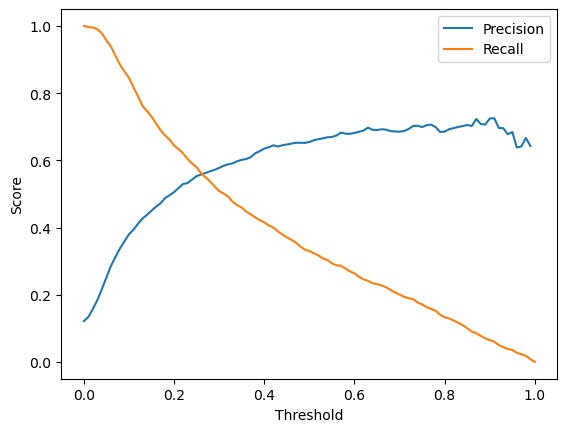

In [28]:
# Plot the thresholds by precision and recall to identify the intersection of precision and recall
plt.plot(df_scores['thresholds'], df_scores['precision'], label='Precision')
plt.plot(df_scores['thresholds'], df_scores['recall'], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

In [29]:
print("The threshold precision and recall curves intersect at 0.265")

The threshold precision and recall curves intersect at 0.265


### **Question 4: F1 score**

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [30]:
# Compute F1 score for all thresholds from 0.0 to 1.0 with increment 0.01
thresholds = np.linspace(0, 1, 101)
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
scores = []

for t in thresholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    scores.append((t, tp, tn, fp, fn, precision, recall, f1))

C:\Users\rluka\AppData\Local\Temp\ipykernel_11256\2061402382.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [31]:
# Define a dataframe of scores
columns = ['thresholds', 'tp', 'tn', 'fp', 'fn', 'precision', 'recall', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,thresholds,tp,tn,fp,fn,precision,recall,f1
0,0.00,1098,0,7944,0,0.121433,1.000000,0.216568
1,0.01,1094,898,7046,4,0.134398,0.996357,0.236848
2,0.02,1093,2128,5816,5,0.158199,0.995446,0.273011
3,0.03,1087,3148,4796,11,0.184770,0.989982,0.311417
4,0.04,1073,4082,3862,25,0.217427,0.977231,0.355710
...,...,...,...,...,...,...,...,...
96,0.96,30,7927,17,1068,0.638298,0.027322,0.052402
97,0.97,25,7930,14,1073,0.641026,0.022769,0.043975
98,0.98,20,7934,10,1078,0.666667,0.018215,0.035461
99,0.99,9,7939,5,1089,0.642857,0.008197,0.016187


In [41]:
f1_max = df_scores[df_scores['f1'] == df_scores['f1'].max()]
best_threshold = f1_max['thresholds'].values[0]

print(f"The threshold with maximum F1: {best_threshold}")

The threshold with maximum F1: 0.22


### **Question 5: 5-Fold CV**

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

In [42]:
from sklearn.model_selection import KFold

In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [49]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['y'].values
    y_val = df_val['y'].values

    df_train = df_train.iloc[:, :-1]
    df_val = df_val.iloc[:, :-1]

    dict_train = df_train.to_dict(orient='records')
    dict_val = df_val.to_dict(orient='records')

    dv.fit(dict_train)
    X_train = dv.transform(dict_train)
    X_val = dv.transform(dict_val)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    mean_scores = np.mean(scores)
    std_scores = np.std(scores)

    print(f"{mean_scores:.3f} +- {std_scores:.3f}")

0.899 +- 0.000
0.899 +- 0.000
0.903 +- 0.006
0.904 +- 0.005
0.906 +- 0.006


In [48]:
print("The largest standard deviation of the scores across different folds is around 0.006")

The largest standard deviation of the scores across different folds is around 0.006


### **Question 6: Hyperparameter Tuning**

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.000001, 0.001, 1]
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [51]:
for C in [0.000001, 0.001, 1]:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['y'].values
        y_val = df_val['y'].values

        df_train = df_train.iloc[:, :-1]
        df_val = df_val.iloc[:, :-1]

        dict_train = df_train.to_dict(orient='records')
        dict_val = df_val.to_dict(orient='records')

        dv.fit(dict_train)
        X_train = dv.transform(dict_train)
        X_val = dv.transform(dict_val)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

        mean_scores = np.mean(scores)
        std_scores = np.std(scores)

    print(f"C= {C}: {mean_scores:.3f} +- {std_scores:.3f}")

C= 1e-06: 0.701 +- 0.009
C= 0.001: 0.861 +- 0.007
C= 1: 0.906 +- 0.006


In [52]:
print("C=1 has the best mean score")

C=1 has the best mean score
